In [49]:
%load_ext autoreload
%autoreload 2

from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Second dimension of the feature is dim2
feature_dim_2 = 11
dataset_size_model = -1

# Save data to array file first
save_data_to_array(max_len=feature_dim_2, size_dataset=dataset_size_model)

# Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 200
batch_size = 100
verbose = 1
num_classes = 4

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

Saving vectors of label - 'bed':   0%|          | 8/1713 [00:00<00:21, 78.43it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Saving vectors of label - 'cat': 100%|██████████| 1733/1733 [00:15<00:00, 114.37it/s]


In [3]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]
#     print(model.predict(sample_reshaped))
#     return np.argmax(model.predict(sample_reshaped))

# Building The Model Then Training it

In [50]:
model = get_model()
model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 3475 samples, validate on 2318 samples
Epoch 1/200
3475/3475 [==============================] - 6s 2ms/step - loss: 1.8797 - acc: 0.4204 - val_loss: 0.7789 - val_acc: 0.7148
Epoch 2/200
3475/3475 [==============================] - 3s 851us/step - loss: 0.8165 - acc: 0.6699 - val_loss: 0.5239 - val_acc: 0.8283
Epoch 3/200
3475/3475 [==============================] - 3s 957us/step - loss: 0.6007 - acc: 0.7796 - val_loss: 0.4236 - val_acc: 0.8585
Epoch 4/200
3475/3475 [==============================] - 3s 914us/step - loss: 0.4832 - acc: 0.8247 - val_loss: 0.3841 - val_acc: 0.8719
Epoch 5/200
3475/3475 [==============================] - 3s 940us/step - loss: 0.3762 - acc: 0.8679 - val_loss: 0.3550 - val_acc: 0.8831
Epoch 6/200
3475/3475 [==============================] - 3s 946us/step - loss: 0.3283 - acc: 0.8904 - val_loss: 0.2599 - val_acc: 0.9172
Epoch 7/200
3475/3475 [==============================] - 3s 910us/step - loss: 0.2538 - acc: 0.9122 - val_loss: 0.4084 - val_acc: 0.

3475/3475 [==============================] - 3s 905us/step - loss: 0.0106 - acc: 0.9977 - val_loss: 0.3059 - val_acc: 0.9521
Epoch 61/200
3475/3475 [==============================] - 3s 845us/step - loss: 0.0046 - acc: 0.9991 - val_loss: 0.3439 - val_acc: 0.9534
Epoch 62/200
3475/3475 [==============================] - 3s 948us/step - loss: 0.0128 - acc: 0.9974 - val_loss: 0.3750 - val_acc: 0.9465
Epoch 63/200
3475/3475 [==============================] - 3s 893us/step - loss: 0.0069 - acc: 0.9980 - val_loss: 0.3255 - val_acc: 0.9543
Epoch 64/200
3475/3475 [==============================] - 3s 939us/step - loss: 0.0024 - acc: 0.9988 - val_loss: 0.3576 - val_acc: 0.9517
Epoch 65/200
3475/3475 [==============================] - 3s 902us/step - loss: 0.0154 - acc: 0.9963 - val_loss: 0.3455 - val_acc: 0.9448
Epoch 66/200
3475/3475 [==============================] - 3s 881us/step - loss: 0.0080 - acc: 0.9963 - val_loss: 0.3166 - val_acc: 0.9543
Epoch 67/200
3475/3475 [=======================

3475/3475 [==============================] - 3s 920us/step - loss: 0.0056 - acc: 0.9988 - val_loss: 0.4210 - val_acc: 0.9461
Epoch 120/200
3475/3475 [==============================] - 3s 831us/step - loss: 0.0020 - acc: 0.9988 - val_loss: 0.3780 - val_acc: 0.9504
Epoch 121/200
3475/3475 [==============================] - 3s 886us/step - loss: 0.0103 - acc: 0.9974 - val_loss: 0.3424 - val_acc: 0.9573
Epoch 122/200
3475/3475 [==============================] - 3s 816us/step - loss: 0.0082 - acc: 0.9983 - val_loss: 0.3309 - val_acc: 0.9586
Epoch 123/200
3475/3475 [==============================] - 3s 896us/step - loss: 5.2006e-04 - acc: 1.0000 - val_loss: 0.3384 - val_acc: 0.9569
Epoch 124/200
3475/3475 [==============================] - 3s 849us/step - loss: 0.0036 - acc: 0.9986 - val_loss: 0.3904 - val_acc: 0.9508
Epoch 125/200
3475/3475 [==============================] - 3s 896us/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.3677 - val_acc: 0.9543
Epoch 126/200
3475/3475 [============

Epoch 178/200
3475/3475 [==============================] - 3s 842us/step - loss: 6.8552e-04 - acc: 1.0000 - val_loss: 0.3946 - val_acc: 0.9556
Epoch 179/200
3475/3475 [==============================] - 3s 898us/step - loss: 9.6276e-04 - acc: 0.9994 - val_loss: 0.4057 - val_acc: 0.9551
Epoch 180/200
3475/3475 [==============================] - 3s 876us/step - loss: 1.1521e-04 - acc: 1.0000 - val_loss: 0.4017 - val_acc: 0.9551
Epoch 181/200
3475/3475 [==============================] - 3s 873us/step - loss: 0.0033 - acc: 0.9988 - val_loss: 0.4126 - val_acc: 0.9513
Epoch 182/200
3475/3475 [==============================] - 3s 882us/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.3569 - val_acc: 0.9569
Epoch 183/200
3475/3475 [==============================] - 3s 846us/step - loss: 0.0022 - acc: 0.9997 - val_loss: 0.3645 - val_acc: 0.9564
Epoch 184/200
3475/3475 [==============================] - 3s 866us/step - loss: 0.0022 - acc: 0.9994 - val_loss: 0.3874 - val_acc: 0.9556
Epoch 185/200
3

## Prediction

In [51]:
# teste audio 
import random

number_audios_classified = {"cat": 0, "happy": 0, "bed": 0, "maconha": 0}
count_audios_with_term = 0

files_dir = os.listdir('./teste_audio')

random.shuffle(files_dir)

for audio in files_dir:
    prediction = predict('./teste_audio/' + audio, model=model)
    number_audios_classified[prediction] += 1
    print('audio: ' + audio + ' é classificado como: ' + prediction)
    count_audios_with_term += 1


audio: maconha-treinoab117ced53a7432db24c3396dc424991.wav é classificado como: maconha
audio: maconha-treino8fa395aae6c5454099266203f590b0b3.wav é classificado como: maconha
audio: maconha-treinoa7974faae4ba45eab20be464a5b0707b.wav é classificado como: maconha
audio: Clipe 258 é classificado como: maconha
audio: maconha-treino80c2535148094f718a7b95f06256f61a.wav é classificado como: maconha
audio: maconha-treino4af5593d5d404ebf9316d72788b17a12.wav é classificado como: maconha
audio: maconha-treinof18293402de34b94857eb5ebe71ec655.wav é classificado como: maconha
audio: maconha-treinocdf717af47c94bb19ce4ec14bf839c1b.wav é classificado como: maconha
audio: maconha-treinoe370a5ebaaf446eda1e9080e821689c6.wav é classificado como: cat
audio: maconha-treino678b8c808d7849918821523e69790c2c.wav é classificado como: maconha
audio: maconha-treino32480a3618d545d38a4fdcef079df093.wav é classificado como: maconha
audio: maconha-treino40dc37c84fa54dab9e051076581fec90.wav é classificado como: maconha
a

audio: maconha-treino5db6e91eedb8439c8bb7928fcc6fb5a3.wav é classificado como: maconha


In [52]:
import numpy as np

sum_false_negative = np.sum([number_audios_classified[i] for i in number_audios_classified if i is not 'maconha']) 
print('Número de falso negativos: ' + str(sum_false_negative))
print('Total de audios: %d'%(count_audios_with_term))
percentage_false_negative = (sum_false_negative / count_audios_with_term) * 100
print('Taxa de falso negativo: ' + str(percentage_false_negative) + '%')


Número de falso negativos: 16
Total de audios: 108
Taxa de falso negativo: 14.814814814814813%


In [54]:
import os

number_audios_classified_2 = {"cat": 0, "happy": 0, "bed": 0, "maconha": 0}
count_audios_no_term = 0 

# files from directorie whatsapp
files_dir = os.listdir('/home/captain-rogers/Área de Trabalho/whatsapp/audio_convert')

for audio in files_dir:
    concat_audio_path = '/home/captain-rogers/Área de Trabalho/whatsapp/audio_convert/' + audio 
    
    prediction = predict(concat_audio_path, model=model)
    
    number_audios_classified_2[prediction] += 1 
    
    print('audio: ' + audio + ' é classificado como: ' + prediction)
    count_audios_no_term += 1
    
print(number_audios_classified_2)

audio: convert_7ac4f505-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_6edba72c-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_7995ebf8-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_4ba596f4-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_541c8bfd-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_4ce00e04-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_668572e7-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_4221aa65-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_481c2f2a-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_70048778-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_552f5dc9-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_40ea7c88-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_422

audio: convert_5ab2673e-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_51bcf721-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_67aa8189-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_6a1bd982-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_4480bd9c-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_3fbc047f-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_7e75681f-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_61c00562-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_67aa818b-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_67aa818a-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_6a1bd984-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_4f51a891-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_4

audio: convert_772ea921-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_541c8bee-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_6edba727-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_541c8bef-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_5ab2673b-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_3fbc047a-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_5e2a63e7-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_46e79b29-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_49535f3b-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_4ab2b19a-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_4ab2b197-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_7d29c4a6-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: con

audio: convert_50660bb8-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_7268ba79-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_668572ef-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_7399f773-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_4ab2b19d-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_46e79b27-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_5cf416dd-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_70048771-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_4480bd90-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_481c2f2f-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_5cf416d4-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_3fbc0482-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_5cf

audio: convert_7995ebfa-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_4ab2b194-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_5cf416de-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_584993c1-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_74c9b788-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_5f5e127c-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_584993bb-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_7861dafd-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_46e79b20-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_40ea7c8a-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_61c00561-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_62ef25dc-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio:

audio: convert_43527360-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_4f51a896-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_6cd94b84-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_4ba596ed-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_584993bd-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_541c8bf6-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_67aa8187-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_7f9b9ce2-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_62ef25d0-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_4f51a890-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_75f9247a-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_6b3d817c-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: c

audio: convert_772ea91d-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_668572ee-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_7399f776-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_552f5dcc-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_7268ba76-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_59754d2e-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_7d29c4ae-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_7861db02-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_74c9b784-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_45b62f3b-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_7861dafb-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_7d29c4ac-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio:

audio: convert_40ea7c89-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_4352735b-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_4ba596ef-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_45b62f44-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_7399f771-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_6416ae9f-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_5ab2673d-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_40ea7c8c-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_4221aa63-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_4221aa64-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_62ef25dd-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_49535f39-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: c

In [46]:
print('Número de falsos positivos: ' + str(number_audios_classified_2['maconha']))
print('Total de audios: %d'%(count_audios_no_term))
percentage_false_positive = (number_audios_classified_2['maconha'] / count_audios_no_term) * 100
print('Taxa de falso positivo: %.2f%%'%(percentage_false_positive))

Número de falsos positivos: 325
Total de audios: 800
Taxa de falso positivo: 40.62%


# Testing the dataset witth all the audios toguether

In [241]:
import os

number_audios_maconha = 10
number_others_audios = 790
false_negative_test_2 = 0
false_positive_test_2 = 0

files_dir = os.listdir('/home/captain-rogers/Área de Trabalho/whatsapp/audios')

for audio in files_dir:
    concat_audio_path = '/home/captain-rogers/Área de Trabalho/whatsapp/audios/' + audio 
    
    prediction = predict(concat_audio_path, model=model)
    
    if 'maconha' in audio and prediction != 'maconha':
        false_negative_test_2 += 1
    elif ('maconha' in audio) == False and prediction == 'maconha':
        false_positive_test_2 += 1
    print('audio: ' + audio + ' é classificado como: ' + prediction)


audio: PTT-20181109-WA0125.opus é classificado como: maconha
audio: PTT-20181026-WA0113.opus é classificado como: maconha
audio: PTT-20181030-WA0099.opus é classificado como: maconha
audio: PTT-20181109-WA0072.opus é classificado como: maconha
audio: PTT-20181021-WA0028.opus é classificado como: maconha
audio: PTT-20181109-WA0021.opus é classificado como: bed
audio: PTT-20181101-WA0006.opus é classificado como: bed
audio: PTT-20180929-WA0012.opus é classificado como: maconha
audio: PTT-20180907-WA0005.opus é classificado como: cat
audio: PTT-20181109-WA0016.opus é classificado como: bed
audio: PTT-20181101-WA0171.opus é classificado como: bed
audio: PTT-20181109-WA0144.opus é classificado como: cat
audio: PTT-20181105-WA0037.opus é classificado como: happy
audio: PTT-20181024-WA0065.opus é classificado como: happy
audio: PTT-20181026-WA0114.opus é classificado como: cat
audio: PTT-20181009-WA0172.opus é classificado como: happy
audio: PTT-20180930-WA0030.opus é classificado como: macon

audio: PTT-20181026-WA0131.opus é classificado como: maconha
audio: PTT-20181101-WA0140.opus é classificado como: bed
audio: PTT-20180908-WA0073.opus é classificado como: cat
audio: PTT-20181105-WA0030.opus é classificado como: maconha
audio: PTT-20180908-WA0077.opus é classificado como: maconha
audio: PTT-20181027-WA0056.opus é classificado como: cat
audio: PTT-20181006-WA0038.opus é classificado como: maconha
audio: PTT-20181008-WA0031.opus é classificado como: maconha
audio: PTT-20181109-WA0165.opus é classificado como: bed
audio: PTT-20181109-WA0100.opus é classificado como: maconha
audio: PTT-20181107-WA0073.opus é classificado como: maconha
audio: PTT-20181102-WA0104.opus é classificado como: happy
audio: PTT-20181107-WA0026.opus é classificado como: happy
audio: PTT-20181102-WA0106.opus é classificado como: maconha
audio: aa4e563aa10e48088874ce908d884d28.opus é classificado como: cat
audio: PTT-20181103-WA0087.opus é classificado como: bed
audio: PTT-20181103-WA0033.opus é class

audio: PTT-20181101-WA0099.opus é classificado como: maconha
audio: PTT-20181009-WA0055.opus é classificado como: cat
audio: PTT-20181104-WA0109.opus é classificado como: happy
audio: maconha_6 é classificado como: maconha
audio: PTT-20181001-WA0128.opus é classificado como: bed
audio: PTT-20181103-WA0055.opus é classificado como: maconha
audio: PTT-20181102-WA0165.opus é classificado como: cat
audio: PTT-20181103-WA0032.opus é classificado como: maconha
audio: PTT-20181001-WA0144.opus é classificado como: cat
audio: PTT-20181109-WA0124.opus é classificado como: bed
audio: PTT-20180905-WA0109.opus é classificado como: bed
audio: PTT-20181027-WA0105.opus é classificado como: cat
audio: PTT-20181109-WA0074.opus é classificado como: happy
audio: PTT-20181101-WA0136.opus é classificado como: happy
audio: PTT-20180919-WA0003.opus é classificado como: maconha
audio: PTT-20181003-WA0011.opus é classificado como: cat
audio: PTT-20181101-WA0074.opus é classificado como: cat
audio: PTT-20181021-

audio: PTT-20181009-WA0168.opus é classificado como: happy
audio: PTT-20181108-WA0043.opus é classificado como: cat
audio: PTT-20181027-WA0048.opus é classificado como: cat
audio: PTT-20181109-WA0116.opus é classificado como: maconha
audio: PTT-20181028-WA0106.opus é classificado como: bed
audio: PTT-20181106-WA0028.opus é classificado como: bed
audio: PTT-20181029-WA0050.opus é classificado como: maconha
audio: PTT-20181028-WA0101.opus é classificado como: happy
audio: PTT-20180831-WA0009.opus é classificado como: maconha
audio: PTT-20181010-WA0079.opus é classificado como: maconha
audio: PTT-20181102-WA0108.opus é classificado como: cat
audio: PTT-20180920-WA0003.opus é classificado como: maconha
audio: PTT-20181101-WA0113.opus é classificado como: bed
audio: PTT-20181106-WA0009.opus é classificado como: cat
audio: PTT-20181109-WA0134.opus é classificado como: maconha
audio: PTT-20181013-WA0030.opus é classificado como: maconha
audio: PTT-20181109-WA0039.opus é classificado como: bed

audio: PTT-20181028-WA0027.opus é classificado como: maconha
audio: PTT-20181101-WA0157.opus é classificado como: happy
audio: PTT-20181104-WA0106.opus é classificado como: maconha
audio: PTT-20181101-WA0075.opus é classificado como: maconha
audio: PTT-20181102-WA0139.opus é classificado como: cat
audio: PTT-20181108-WA0024.opus é classificado como: bed
audio: PTT-20181002-WA0011.opus é classificado como: cat
audio: PTT-20181109-WA0163.opus é classificado como: bed
audio: PTT-20181029-WA0026.opus é classificado como: cat
audio: PTT-20181109-WA0132.opus é classificado como: maconha
audio: PTT-20181101-WA0093.opus é classificado como: maconha
audio: PTT-20181027-WA0107.opus é classificado como: happy
audio: PTT-20181107-WA0040.opus é classificado como: maconha
audio: PTT-20181027-WA0060.opus é classificado como: cat
audio: PTT-20181013-WA0031.opus é classificado como: maconha
audio: PTT-20181109-WA0081.opus é classificado como: bed
audio: PTT-20181105-WA0082.opus é classificado como: cat

audio: PTT-20181026-WA0076.opus é classificado como: maconha
audio: PTT-20181107-WA0022.opus é classificado como: maconha
audio: PTT-20181030-WA0098.opus é classificado como: maconha
audio: PTT-20181102-WA0101.opus é classificado como: happy
audio: PTT-20181010-WA0048.opus é classificado como: cat
audio: PTT-20180919-WA0004.opus é classificado como: maconha
audio: PTT-20181030-WA0026.opus é classificado como: maconha
audio: PTT-20181101-WA0125.opus é classificado como: maconha
audio: PTT-20181101-WA0133.opus é classificado como: maconha
audio: PTT-20181009-WA0171.opus é classificado como: cat
audio: PTT-20181103-WA0078.opus é classificado como: cat
audio: maconha_3 é classificado como: maconha
audio: PTT-20181101-WA0004.opus é classificado como: cat
audio: PTT-20181028-WA0167.opus é classificado como: cat
audio: PTT-20181106-WA0044.opus é classificado como: bed
audio: PTT-20181010-WA0065.opus é classificado como: maconha
audio: PTT-20181109-WA0032.opus é classificado como: bed
audio: P

In [242]:
print('Número de falsos negativos: %d' %(false_negative_test_2))

percentual_teste2_fn = ( false_negative_test_2 / number_audios_maconha ) * 100.0
print('Percentual falso negativo: %2.f%%\n\n'%(percentual_teste2_fn))

print('Número de falsos positivos: %d' %(false_positive_test_2))

percentual_teste2_fp = ( false_positive_test_2 / number_others_audios ) * 100.0
print('Percentual falso positivo: %2.f%%'%(percentual_teste2_fp))

Número de falsos negativos: 0
Percentual falso negativo:  0%


Número de falsos positivos: 345
Percentual falso positivo: 44%


In [ ]:
teste = predict('./teste4', model=model)

print(teste)

##  Audio with expression "maconha" inside represent in waveplot and spectogram image 

Populating the interactive namespace from numpy and matplotlib


/home/captain-rogers/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


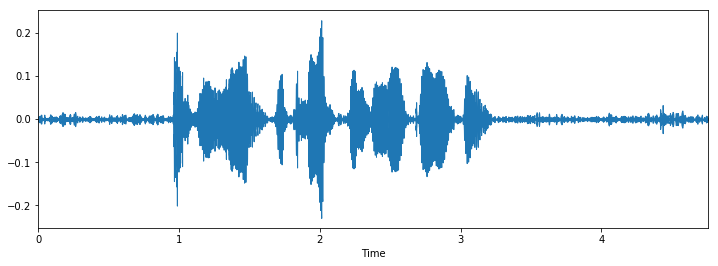

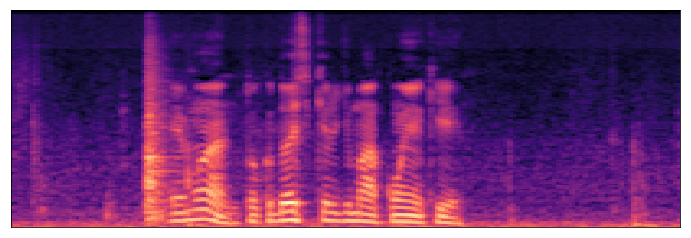

In [181]:
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob

# Audio with expression "maconha" inside with another terms
data, sampling_rate = librosa.load('./teste4')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(S_dB, sr=sampling_rate)


## Unique "maconha" expression audio in waveplot and spectogram image 

In [ ]:
# an audio with an expression unique "maconha"
data, sampling_rate = librosa.load('./data/maconha/maconha-0a5388ecab714fab84f39b6948270fbe.wav')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(S_dB, sr=sampling_rate)

# Análise de bechmark

In [11]:
# save the information about statistic in csv to show in table

import pandas as pd

def save_data_analyse(filename):
    data = pd.DataFrame({
                         "Qtd dataset": [], 
                         "Falso positivo": [],
                         "Falso negativo": [],
                         "Porcentagem FP": [],
                         "Porcentagem FN": []
                        })

    try:
        data = pd.read_csv(filename, sep = ',')
    except FileNotFoundError:
        with open( filename, 'w'):
            data.to_csv( filename, index=False)
            print(data)
    except pd.errors.EmptyDataError:
        data.to_csv( filename, index=False)
        print(data)

    if filename == 'save.csv' or filename == 'save_test3.csv':
        data_add = pd.DataFrame({
            "Qtd dataset": [dataset_size_model], 
            "Falso positivo": [number_audios_classified_2['maconha']],
            "Falso negativo": [sum_false_negative],
            "Porcentagem FP": [percentage_false_positive],
            "Porcentagem FN": [percentage_false_negative]
        })
    elif filename == 'save_test2.csv':
        data_add = pd.DataFrame({
            "Qtd dataset": [dataset_size_model], 
            "Falso positivo": [false_positive_test_2],
            "Falso negativo": [false_negative_test_2],
            "Porcentagem FP": [percentual_teste2_fp],
            "Porcentagem FN": [percentual_teste2_fn]
        })

    print(data)

    data = data.append(data_add)
    open( filename, "w").close()
    data.to_csv( filename, index=False)

In [14]:
import matplotlib.pyplot as plt
import  pandas as pd

def plot_table_csv(filename):
    data = pd.read_csv( filename )
    cell_text = data.values.tolist()

    # Prepare table
    columns = (
        'Qtd dataset',
        'Falso positivo', 
        'Falso negativo', 
        'Porcentagem FP(%)', 
        'Porcentagem FN(%)'
    )

    # Add a table at the bottom of the axes
    colors = [["#56b5fd","w","w","w","w"]]

    for i in range( len(cell_text) - 1 ):
        colors.append(["#56b5fd","w","w","w","w"])

    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=cell_text,cellColours=colors,
                        colWidths=[.4]*5, colLabels=columns,loc='center')

    the_table.set_fontsize(20)
    the_table.scale(1, 2)

    plt.show()

In [243]:
save_data_analyse('save_test2.csv')

   Qtd dataset  Falso positivo  Falso negativo  Porcentagem FP  Porcentagem FN
0           50             128               4       16.202532            40.0
1          100             380               1       48.101266            10.0
2          200             226               0       28.607595             0.0
3          300             228               2       28.860759            20.0


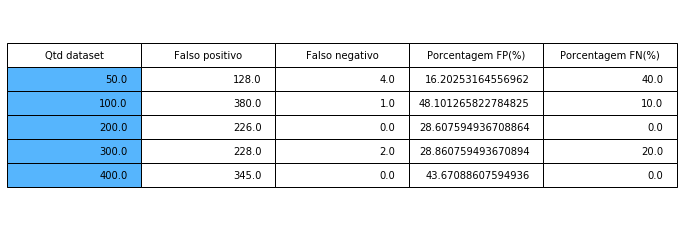

In [244]:
plot_table_csv('save_test2.csv')

In [213]:
save_data_analyse('save.csv')

Empty DataFrame
Columns: [Qtd dataset, Falso positivo, Falso negativo, Porcentagem FP, Porcentagem FN]
Index: []


In [1]:
plot_table_csv('save.csv')

NameError: name 'plot_table_csv' is not defined

In [47]:
save_data_analyse('save_test3.csv')

   Qtd dataset  Falso positivo  Falso negativo  Porcentagem FP  Porcentagem FN
0        100.0           227.0            17.0          28.375       15.740741
1        200.0           261.0            10.0          32.625        9.259259
2        300.0           326.0             9.0          40.750        8.333333
3        400.0           261.0            11.0          32.625       10.185185


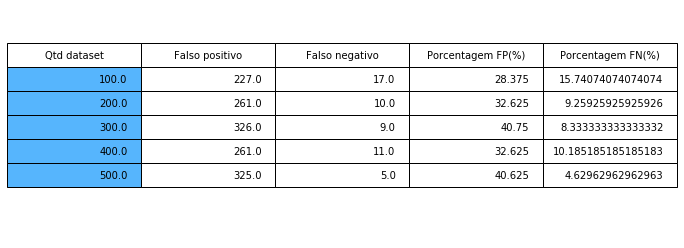

In [48]:
plot_table_csv('save_test3.csv')